# MACHINE LEARNING

6. Data Visualization
    1. Seaborn: https://www.kaggle.com/kanncaa1/seaborn-for-beginners
    1. Bokeh: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-1
    1. Bokeh: https://www.kaggle.com/kanncaa1/interactive-bokeh-tutorial-part-2
7. Statistical Thinking
    1. coming soon
8. Machine Learning
    1. Supervised Learning
        1. EDA(Exploratory Data Analysis)
        1. K-Nearest Neighbors (KNN)
        1. Regression
        1. Cross Validation (CV)
        1. ROC Curve
        1. Hyperparameter Tuning
        1. Pre-procesing Data
    1. Unsupervised Learning
        1. Kmeans Clustering
        1. Evaluation of Clustering
        1. Standardization
        1. Hierachy
        1. T - Distributed Stochastic Neighbor Embedding (T - SNE)
        1. Principle Component Analysis (PCA)

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv('data/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


# 8. MACHINE LEARNING (ML)
In python there are some ML libraries like sklearn, keras or tensorflow. We will use sklearn.


## A. SUPERVISED LEARNING
* Supervised learning: It uses data that has labels. 
    * Features(predictor variable)
    * Target variable
    * Classification
    * Regression
    * Terminology: features = predictor variable = independent variable = columns = inputs. target variable = responce variable = class = dependent variable = output = result

### EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
# to see features and target variable
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [5]:
# NaN value and length of this data so lets look at info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt numeric         310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
class                       310 non-null object
dtypes: float64(6), object(1)
memory usage: 17.0+ KB


As you can see:
* length: 310 (range index)
* Features are float
* Target variables are object that is like string
* Describe(): in order to visualize data, values should be closer each other.

In [6]:
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


pd.plotting.scatter_matrix:
* green: *normal* and red: *abnormal*
* c:  color
* figsize: figure size
* diagonal: histohram of each features
* alpha: opacity
* s: size of marker
* marker: marker type 

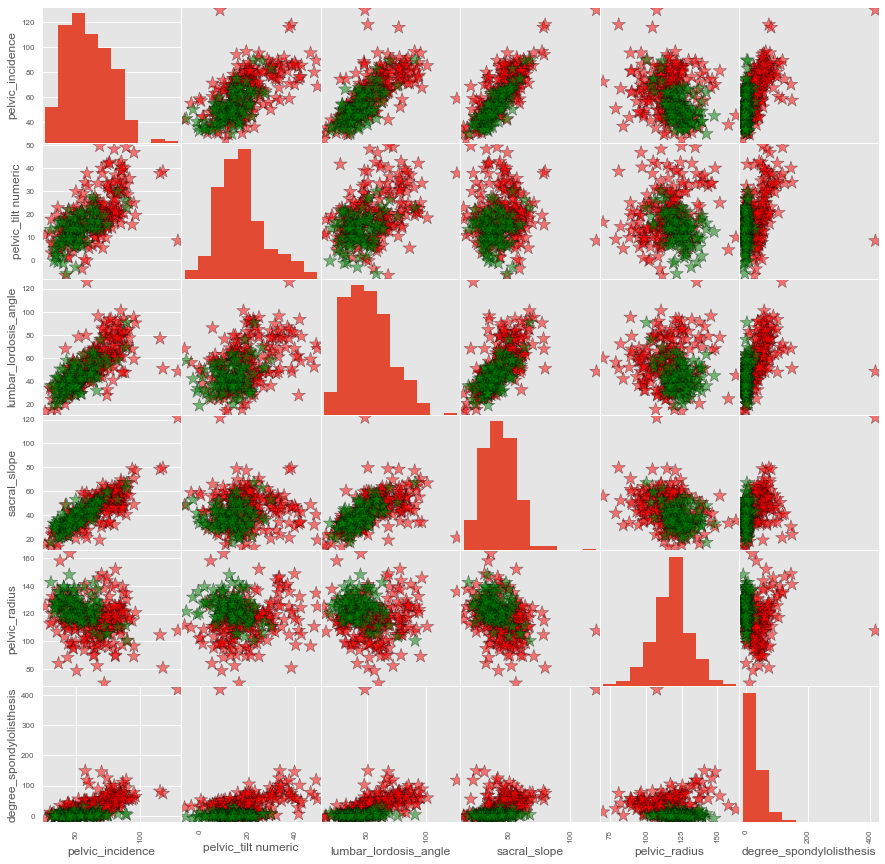

In [7]:
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pd.plotting.scatter_matrix(data.loc[:, data.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

Okay, as you understand in scatter matrix there are relations between each feature but how many *normal(green)* and *abnormal(red)* classes are there. 
* Searborn library has *countplot()* that counts number of classes
* Also you can print it with *value_counts()* method

<br> This data looks like balanced. Actually there is no definiton or numeric value of balanced data but this data is balanced enough for us.

Abnormal    210
Normal      100
Name: class, dtype: int64

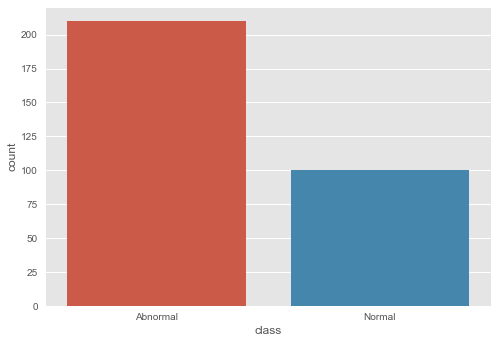

In [8]:
sns.countplot(x="class", data=data)
data.loc[:,'class'].value_counts()

###  K-NEAREST NEIGHBORS (KNN)
* KNN: Look at the K closest labeled data points
* Classification method.
* First we need to train our data. Train = fit
* fit(): fits the data, train the data.
* predict(): predicts the data
<br>

* x: features
* y: target variables(normal, abnormal)
* n_neighbors: K. In this example it is 3. it means that Look at the 3 closest labeled data points


In [9]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Ab

Measuring model performance:

Split our data train and test sets.
* train_test_split(x,y,test_size = 0.3,random_state = 1)
    * x: features
    * y: target variables (normal,abnormal)
    * test_size: percentage of test size. Example test_size = 0.3, test size = 30% and train size = 70%
    * random_state: sets a seed. If this seed is same number, train_test_split() produce exact same split at each time
* fit(x_train,y_train): fit on train sets
* score(x_test,y_test)): predict and give accuracy on test sets

In [10]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.860215053763


Why we choose K = 3 or what value we need to choose K. 

<br> Model complexity:
* K has general name. It is called a hyperparameter. We need to choose it that gives best performace. 
* Literature says if k is small, model is complex model can lead to overfit.
* If k is big, model that is less complex model can lead to underfit. 
* At below, I range K value from 1 to 25(exclude) and find accuracy for each K value. As you can see in plot, when K is 1 it memozize train sets and cannot give good accuracy on test set (overfit). Also if K is 18, model is lead to underfit. Again accuracy is not enough. However look at when K is 18(best performance), accuracy has highest value almost 88%. 

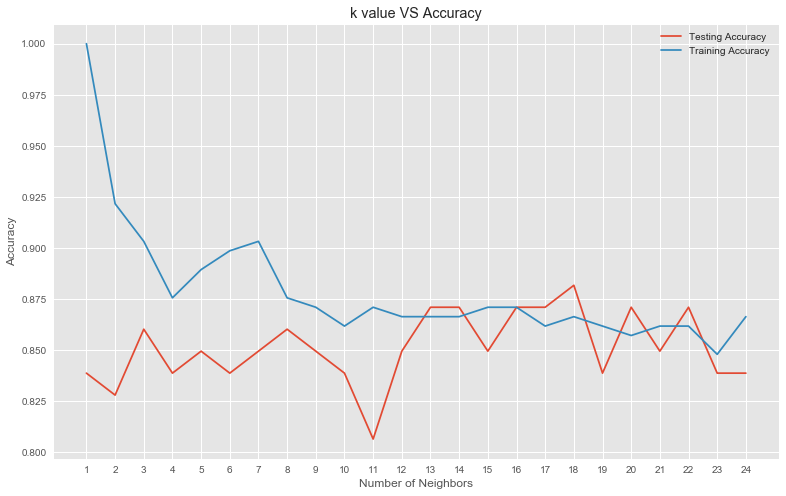

Best accuracy is 0.8817204301075269 with K = 18


In [11]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

**What happens if I chance the title KNN and make it some other classification technique like Random Forest?**
* The answer is **nothing**. What you need to is just watch a video about what is random forest in youtube and implement what you learn in KNN. Because the idea and even most of the codes (only KNeighborsClassifier need to be RandomForestClassifier ) are same. You need to split, fit, predict your data and measue performance and choose hyperparameter of random forest(like max_depth). 

### REGRESSION
* Supervised learning
* Linear and logistic regressions
* Consider feature is pelvic_incidence and target is sacral_slope 
    * reshape(-1,1): If you do not use it shape of x or y becaomes (210,) and we cannot use it in sklearn, so we use shape(-1,1) and shape of x or y be (210, 1). 

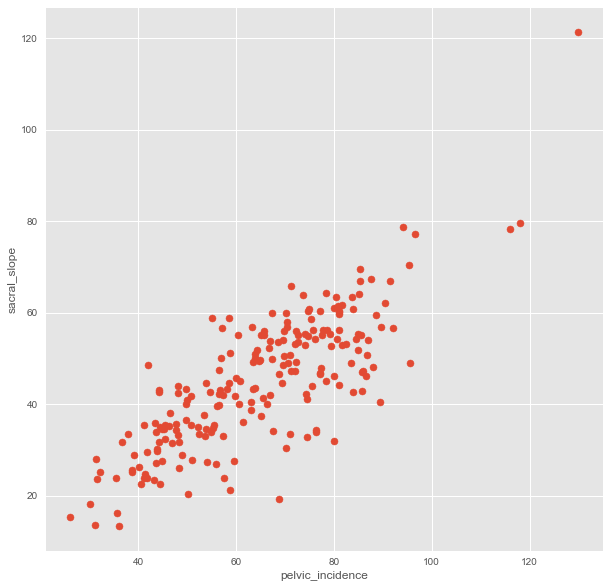

In [43]:
# create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

<br> Linear regression
* Score: Score uses R^2 method that is ((y_pred - y_mean)^2 )/(y_actual - y_mean)^2

R^2 score:  0.645841048108


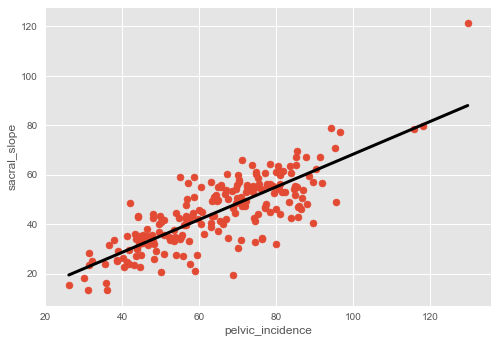

In [45]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

R^2 score:  0.622847288327


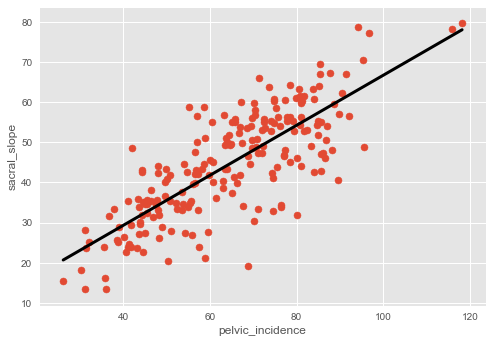

In [46]:
index = data1[data1.loc[:,'pelvic_incidence'] > 120].index

x2 = np.delete(np.array(data1.loc[:,'pelvic_incidence']), index).reshape(-1,1)
y2 = np.delete(np.array(data1.loc[:,'sacral_slope']), index).reshape(-1,1)

reg = LinearRegression()
predict_space = np.linspace(min(x2), max(x2)).reshape(-1,1)
reg.fit(x2,y2)
predicted = reg.predict(predict_space)
print('R^2 score: ',reg.score(x2, y2))

plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(x=x2,y=y2)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

### CROSS VALIDATION

* K folds = K fold CV.
* When K is increase, computationally cost is increase
* cross_val_score(reg,x,y,cv=5): use reg(linear regression) with x and y that we define at above and K is 5. It means 5 times(split, train,predict)


In [38]:
# CV
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
k = 5
cv_result = cross_val_score(reg,x,y,cv=k) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('CV scores average: ',np.sum(cv_result)/k)

CV Scores:  [ 0.18141327  0.62221753  0.32057618  0.25051847  0.25362525]
CV scores average:  0.325670141233


### Regularized Regression
Use regularization that penalize large coefficients, to avoid overfitting.

* Ridge regression: First regularization technique. Also it is called L2 regularization. 
    * Ridge regression lost fuction = OLS + alpha * sum(parameter^2)
    * alpha is parameter we need to choose to fit and predict. Picking alpha is similar to picking K in KNN. As you understand alpha is hyperparameter that we need to choose for best accuracy and model complexity. This process is called hyperparameter tuning.
    * If alpha = zero: lost function = OLS so that is linear rigression
    * If alpha is small that can cause overfitting
    * If alpha is big that can cause underfitting. 
* Lasso regression: Second regularization technique. Also it is called L1 regularization. 
    * Lasso regression lost fuction = OLS + alpha * sum(absolute_value(parameter))
    * It can be used to select important features od the data. Because features whose values are not shrinked to zero, is chosen by lasso regression
    * In order to choose feature, I add new features in our regression data
    
<br> Linear vs Ridge vs Lasso

First impression: Linear

Feature Selection: 1.Lasso 2.Ridge

Regression model: 1.Ridge 2.Lasso 3.Linear 



In [47]:
# Ridge
from sklearn.linear_model import Ridge
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha = 0.1, normalize = True)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print('Ridge score: ',ridge.score(x_test,y_test))

Ridge score:  0.560828791884


In [48]:
# Lasso
from sklearn.linear_model import Lasso
x = np.array(data1.loc[:,['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','pelvic_radius']])
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.1, normalize = True)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.964033480433
Lasso coefficients:  [ 0.82498243 -0.7209057   0.         -0.        ]


As you can see *pelvic_incidence* and *pelvic_tilt numeric* are important features but others are not important

<br> Accuracy: confusion matrix as a model measurement matris in imbalance data.
<br> While using confusion matrix lets use Random forest classifier to diversify classification methods.
* tp = true positive(20), fp = false positive(7), fn = false negative(8), tn = true negative(58) 
* tp = Prediction is positive(normal) and actual is positive(normal). 
* fp = Prediction is positive(normal) and actual is negative(abnormal).
* fn = Prediction is negative(abnormal) and actual is positive(normal).
* tn = Prediction is negative(abnormal) and actual is negative(abnormal)
* precision = tp / (tp+fp)
* recall = tp / (tp+fn)
* f1 = 2 * precision * recall / ( precision + recall)



In [49]:
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = data.loc[:,data.columns != 'class'], data.loc[:,'class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[58  8]
 [ 7 20]]
Classification report: 
              precision    recall  f1-score   support

   Abnormal       0.89      0.88      0.89        66
     Normal       0.71      0.74      0.73        27

avg / total       0.84      0.84      0.84        93



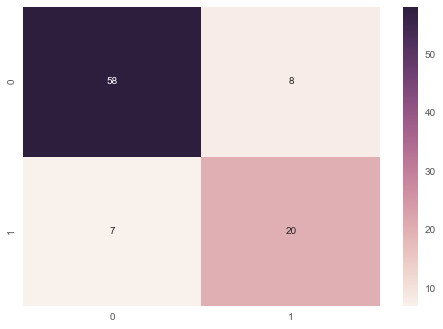

In [50]:
# visualize with seaborn library
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

### ROC Curve with Logistic Regression 
* logistic regression output is probabilities
* If probability is higher than 0.5 data is labeled 1(abnormal) else 0(normal)
* By default logistic regression threshold is 0.5
* ROC is receiver operationg characteristic. In this curve x axis is false positive rate and y axis is true positive rate
* If the curve in plot is closer to left-top corner, test is more accurate.
* Roc curve score is auc (Area Under the Curve) that is computation area under the curve from prediction scores
* We want auc to closer 1
* fpr = False Positive Rate
* tpr = True Positive Rate
* If you want, I made ROC, Random forest and K fold CV in this tutorial. https://www.kaggle.com/kanncaa1/roc-curve-with-k-fold-cv/

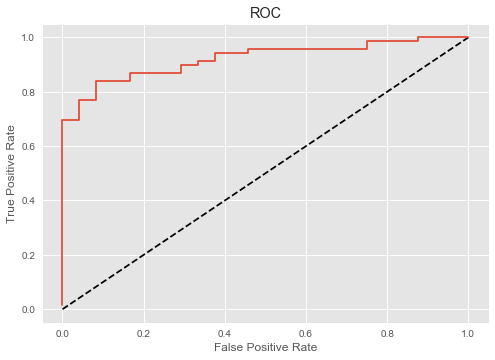

In [51]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
# abnormal = 1 and normal = 0
data['class_binary'] = [1 if i == 'Abnormal' else 0 for i in data.loc[:,'class']]
x,y = data.loc[:,(data.columns != 'class') & (data.columns != 'class_binary')], data.loc[:,'class_binary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()


### HYPERPARAMETER TUNING
Hyperparameters that are need to be tuned
* For example: 
    * k at KNN
    * alpha at Ridge and Lasso
    * Random forest parameters like max_depth
    * linear regression parameters(coefficients)
* Hyperparameter tuning: 
    * try all of combinations of different parameters
    * fit all of them
    * measure prediction performance
    * see how well each performs
    * finally choose best hyperparameters
* We only need is one line code that is GridSearchCV
    * grid: K is from 1 to 50(exclude)
    * GridSearchCV takes knn and grid and makes grid search. It means combination of all hyperparameters. Here it is k.

In [53]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(x,y)# Fit

# Print hyperparameter
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 4}
Best score: 0.7548387096774194


Other grid search example with 2 hyperparameter
* First hyperparameter is C:logistic regression regularization parameter
    * If C is high: overfit
    * If C is low: underfit
* Second hyperparameter is penalty(lost function): l1 (Lasso) or l2(Ridge) as we learnt at linear regression part.

In [55]:
# grid search cross validation with 2 hyperparameter
# 1. hyperparameter is C:logistic regression regularization parameter
# 2. penalty l1 or l2
# Hyperparameter grid
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 12)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

Tuned hyperparameters : {'C': 100.0, 'penalty': 'l2'}
Best Accuracy: 0.8525345622119815


### PRE-PROCESSING DATA
* In real life data can include objects or categorical data in order to use them in sklearn we need to encode them into numerical data
* In data, class is *abnormal* and *normal*. Lets convert them into numeric value (actually I did it in logistic regression part with different method)
* 2 different feature is created with the name *class_Abnormal* and *class_Normal*
* However we need to drop one of the column because they are duplicated

In [63]:
# Load data
data = pd.read_csv('data/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
# get_dummies
df = pd.get_dummies(data)
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal,class_Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,1,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1,0


In [64]:
# drop one of the feature
df.drop("class_Normal",axis = 1, inplace = True) 
df.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Abnormal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,1
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1


In [65]:
df2 = pd.get_dummies(data, drop_first=True)
df2.head(10)

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_Normal
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,0
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,0
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0


Other preprocessing step is centering, scaling or normalizing 
* KNN uses form of distance for classificaiton like some oher methods. Therefore, we need to scale data. For this reason, we use 
    * standardization: ( x - x.mean) / x.variance   or   x - x.min / x.range
* pipeline: The purpose of the pipeline is to assemble several steps like svm(classifier) and  standardization(pre-processing)
* How we create parameters name: for example SVM_ _C :  stepName__parameterName
* Then grid search to find best parameters

In [66]:
# SVM, pre-process and pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 1)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=3)
cv.fit(x_train,y_train)

y_pred = cv.predict(x_test)

print("Accuracy: {}".format(cv.score(x_test, y_test)))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.8548387096774194
Tuned Model Parameters: {'SVM__C': 100, 'SVM__gamma': 0.01}


## UNSUPERVISED LEARNING
* Unsupervised learning: It uses data that has unlabeled and uncover hidden patterns from unlabeled data.
* Visualize just consider *pelvic_radius* and *degree_spondylolisthesis*


### KMEANS
* KMeans Cluster: The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity
* KMeans(n_clusters = 2): n_clusters = 2 means that create 2 cluster

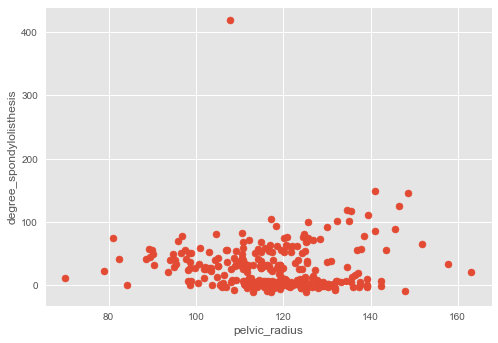

In [67]:
# As you can see there is no labels in data
data = pd.read_csv('data/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'])
plt.xlabel('pelvic_radius')
plt.ylabel('degree_spondylolisthesis')
plt.show()

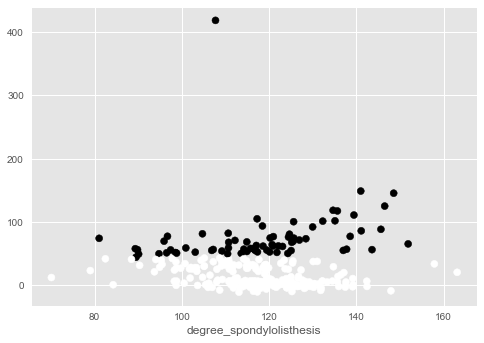

In [68]:
# KMeans Clustering
data2 = data.loc[:,['degree_spondylolisthesis','pelvic_radius']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data2)
labels = kmeans.predict(data2)
plt.scatter(data['pelvic_radius'],data['degree_spondylolisthesis'],c = labels)
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

### EVALUATING OF CLUSTERING
We cluster data in two groups. Use cross tabulation table to evaluate clustering.
* There are two clusters that are *0* and *1* 
* First class *0* includes 138 abnormal and 100 normal patients
* Second class *1* includes 72 abnormal and 0 normal patiens
*The majority of two clusters are abnormal patients.

In [69]:
# cross tabulation table
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0            138     100
1             72       0


The new question is that we know how many class data includes, but what if number of class is unknow in data. This is kind of like hyperparameter in KNN or regressions. 
* inertia: how spread out the clusters are distance from each sample
* lower inertia means more clusters
* What is the best number of clusters ?
    *There are low inertia and not too many cluster trade off so we can choose elbow

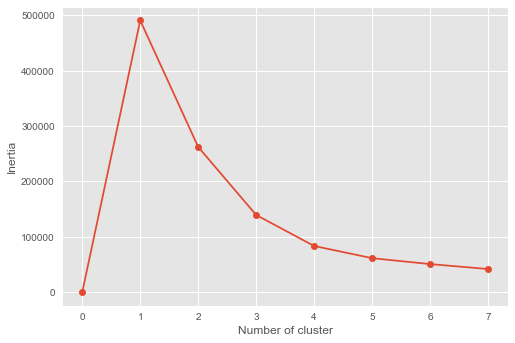

In [70]:
# inertia
inertia_list = np.empty(8)
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

### STANDARDIZATION
* Standardizaton is important for both supervised and unsupervised learning
* Do not forget standardization as pre-processing
* As we already have visualized data so you got the idea. Now we can use all features for clustering.
* We can use pipeline like supervised learning.

In [71]:
data = pd.read_csv('data/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
data3 = data.drop('class',axis = 1)

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar,kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels':labels,"class":data['class']})
ct = pd.crosstab(df['labels'],df['class'])
print(ct)

class   Abnormal  Normal
labels                  
0             94      90
1            116      10


### HIERARCHY
* vertical lines are clusters
* height on dendogram: distance between merging cluster
* method= 'single' : closest points of clusters

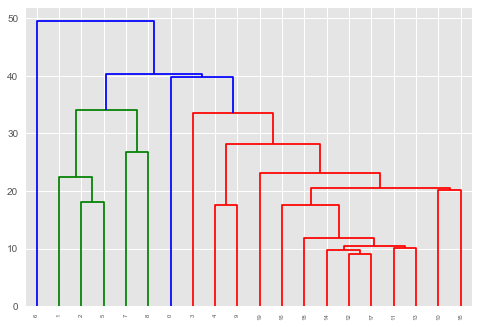

In [73]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(data3.iloc[200:220,:],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.show()

 ### T - Distributed Stochastic Neighbor Embedding (T - SNE)
 * learning rate: 50-200 in normal
 * fit_transform: it is both fit and transform. t-sne has only have fit_transform
 * Varieties have same position relative to one another

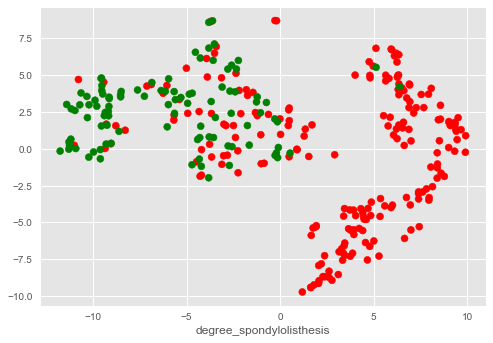

In [74]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(data2)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list )
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

### PRINCIPLE COMPONENT ANALYSIS (PCA)
* Fundemental dimension reduction technique
* first step is decorrelation:
    * rotates data samples to be aligned with axes
    * shifts data asmples so they have mean zero
    * no information lost
    * fit() : learn how to shift samples
    * transform(): apply the learned transformation. It can also be applies test data
* Resulting PCA features are not linearly correlated
* Principle components: directions of variance

In [75]:
# PCA
from sklearn.decomposition import PCA
model = PCA()
model.fit(data3)
transformed = model.transform(data3)
print('Principle components: ',model.components_)

Principle components:  [[  3.23645647e-01   1.13192291e-01   3.03674740e-01   2.10453357e-01
   -2.99598300e-02   8.63153779e-01]
 [ -4.76634849e-01  -9.85632787e-02  -5.32783979e-01  -3.78071570e-01
    3.21809199e-01   4.82438036e-01]
 [ -1.54481282e-03  -2.64657410e-01  -4.96541893e-01   2.63112598e-01
   -7.74612852e-01   1.18940778e-01]
 [  3.73677251e-01   7.54113757e-01  -3.39411757e-01  -3.80436506e-01
   -1.75106042e-01  -3.29143086e-02]
 [ -4.41703869e-01   7.35414748e-02   5.12024113e-01  -5.15245344e-01
   -5.14639730e-01   8.35992525e-02]
 [  5.77350269e-01  -5.77350269e-01  -1.08930766e-11  -5.77350269e-01
   -3.59066811e-12   3.06727015e-12]]


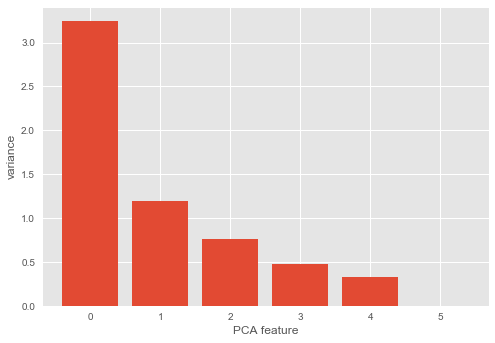

In [76]:
# PCA variance
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data3)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()


* Second step: intrinsic dimension: number of feature needed to approximate the data essential idea behind dimension reduction
* PCA identifies intrinsic dimension when samples have any number of features
* intrinsic dimension = number of PCA feature with significant variance
* In order to choose intrinsic dimension try all of them and find best accuracy

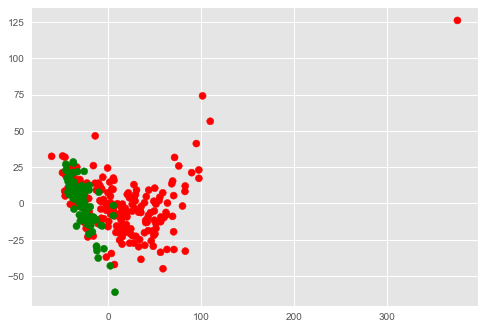

In [77]:
# apply PCA
pca = PCA(n_components = 2)
pca.fit(data3)
transformed = pca.transform(data3)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list)
plt.show()